## Hypothesis Testing

- One-sample hypothesis testing: This type of hypothesis testing is used to compare a sample mean, proportion or variance to a known or hypothesized population value.

- Two-sample hypothesis testing: This type of hypothesis testing is used to compare the means, proportions or variances of two independent samples.

- Paired or dependent samples hypothesis testing: This type of hypothesis testing is used to compare the means, proportions or variances of two dependent or related samples.

- Chi-square test: This type of hypothesis testing is used to determine whether there is a significant association between two categorical variables.

- ANOVA (Analysis of Variance): This type of hypothesis testing is used to compare the means of two or more independent groups.

- MANOVA (Multivariate Analysis of Variance): This type of hypothesis testing is used to compare the means of two or more dependent variables across two or more independent groups.

- T-test: This type of hypothesis testing is used to compare the means of two independent samples.

- Z-test: This type of hypothesis testing is used to compare a sample mean to a known or hypothesized population mean when the population standard deviation is known.

- F-test: This type of hypothesis testing is used to compare the variances of two or more independent groups.

### Z-Test

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from math import sqrt
import matplotlib.pyplot as plt
# Set the seed for reproducibility
np.random.seed(123)



# Generate a population of 100000 data points with mean 4 and standard deviation 0.3
population = np.random.normal(loc=mu, scale=sigma, size=100000)

# population parameters
mu = 4
sigma = 0.3
N = len(population)

# Take a random sample of 100 data points from the population
sample = np.random.choice(population, size=100)
n = len(sample)

# Calculate the mean, median, standard deviation, and standard error of the sample
s_mean = np.mean(sample)
s_median = np.median(sample)
s_std = np.std(sample, ddof=1)
s_se = std / np.sqrt(len(sample))

# Print the results
print("Sample Mean: ", round(s_mean, 3))
print("Sample Median: ", round(s_median, 3))
print("Sample Standard Deviation: ", round(s_std, 3))
print("Sample Standard Error: ", round(s_se, 3))

# Use statsmodels to calculate a 95% confidence interval for the population mean
ci = sm.stats.DescrStatsW(sample).tconfint_mean(alpha=0.05)
print("95% Confidence Interval for Population Mean: ({}, {})".format(round(ci[0], 3), round(ci[1], 3)))


Sample Mean:  3.963
Sample Median:  3.945
Sample Standard Deviation:  0.272
Sample Standard Error:  0.027
95% Confidence Interval for Population Mean: (3.909, 4.017)


In [36]:
z = (s_mean - mu) / (sigma / sqrt(n))
print(z)

-1.2314757716356115


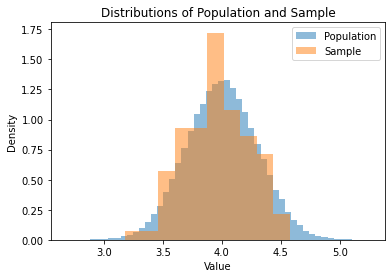

In [37]:
# Plot the distributions of the sample and population
fig, ax = plt.subplots()
ax.hist(population, bins=50, density=True, alpha=0.5, label='Population')
ax.hist(sample, bins=10, density=True, alpha=0.5, label='Sample')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Distributions of Population and Sample')
ax.legend()
plt.show()

$CDF(x; \mu, \sigma) = \dfrac{1}{\sigma\sqrt{2\pi}} \displaystyle\int_{-\infty}^{x} e^{-\dfrac{(t-\mu)^2}{2\sigma^2}}\:dt$

In [38]:
from scipy.stats import norm


alpha = 0.05
# Calculate the p-value for a right-tailed Z-test
p_value = norm.cdf(-1.23)

# Print the p-value
print('p-value:', p_value)

if(p_value < alpha):
    print("Reject null hypothesis")
else:
    print("Don't reject null hypothesis")


p-value: 0.10934855242569191
Don't reject null hypothesis


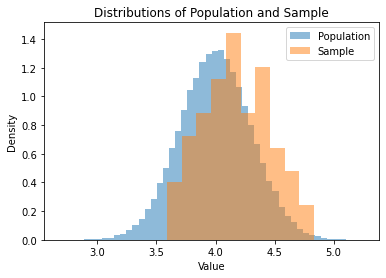

In [72]:
s_mean2 = 4.2
sample2 = np.random.normal(loc=s_mean2, scale=sigma, size=100)

# Plot the distributions of the sample and population
fig, ax = plt.subplots()
ax.hist(population, bins=50, density=True, alpha=0.5, label='Population')
ax.hist(sample2, bins=10, density=True, alpha=0.5, label='Sample')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Distributions of Population and Sample')
ax.legend()
plt.show()

In [73]:
z2 = (s_mean2 - mu) / (sigma / sqrt(n))
print(z2)

6.666666666666673


In [75]:
alpha = 0.05
# Calculate the p-value for a right-tailed Z-test
p_value = norm.sf(z2)
p_value = 1-norm.cdf(z2)

# Print the p-value
print('p-value:', p_value)

if(p_value < alpha):
    print("Reject null hypothesis")
else:
    print("Don't reject null hypothesis")

p-value: 1.308397834520747e-11
Reject null hypothesis


### $\chi^2$ Test

Where
- Degrees of Freedom $= df = (r - 1) * (c - 1)$

In [76]:
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table
observed = np.array([[10, 20, 30],
                     [6,  9,  17]])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:\n", expected)


Chi-squared statistic: 0.27157465150403504
p-value: 0.873028283380073
Degrees of freedom: 2
Expected values:
 [[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
